In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from functions import *

In [3]:
df = pd.read_csv('../data/loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
df2 = pd.read_csv('../data/train.csv')
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
columns_to_generate = ['Gender', 'Married']

# Generar los datos sintéticos
df = generate_synthetic_data(df, df2, columns_to_generate)

In [6]:
df = df[['Gender', 'Married', ' no_of_dependents', ' education', ' self_employed', 
         ' income_annum', ' loan_amount', ' loan_status']]
df2 = df2[['Gender', 'Married','Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Loan_Status']]

In [7]:
df = name_columns(df)
df2 = name_columns(df2)

In [8]:
remove_last_digits(df, 'income_annum', 2)
remove_last_digits(df, 'loan_amount', 4)

,gender,married,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_status
0,Male,No,2,Graduate,No,96000,2990,Approved
1,Male,Yes,0,Not Graduate,Yes,41000,1220,Rejected
2,Male,Yes,3,Graduate,No,91000,2970,Rejected
3,Male,Yes,3,Graduate,No,82000,3070,Rejected
4,Male,No,5,Not Graduate,Yes,98000,2420,Rejected
...,...,...,...,...,...,...,...,...
4264,Male,Yes,5,Graduate,Yes,10000,230,Rejected
4265,Male,Yes,0,Not Graduate,Yes,33000,1130,Approved
4266,Male,No,2,Not Graduate,No,65000,2390,Rejected
4267,Female,Yes,1,Not Graduate,No,41000,1280,Approved


In [9]:
df2 = multiply_column(df2, 'applicantincome')

In [10]:
df2 = replace_approval_status(df2, 'loan_status')

In [11]:
df = rename_columns(df)
df2 = rename_columns(df2)

In [12]:
df_final = pd.concat([df, df2], axis=0)
df_final

,gender,married,dependents,education,self_employed,income,loan_amount,loan_status
0,Male,No,2,Graduate,No,96000,2990,Approved
1,Male,Yes,0,Not Graduate,Yes,41000,1220,Rejected
2,Male,Yes,3,Graduate,No,91000,2970,Rejected
3,Male,Yes,3,Graduate,No,82000,3070,Rejected
4,Male,No,5,Not Graduate,Yes,98000,2420,Rejected
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,34800,71.0,Approved
610,Male,Yes,3+,Graduate,No,49272,40.0,Approved
611,Male,Yes,1,Graduate,No,96864,253.0,Approved
612,Male,Yes,2,Graduate,No,90996,187.0,Approved


In [13]:
df_final = strip_all_columns(df_final)

In [14]:
df_final.drop_duplicates(inplace=True)
df_final.dropna(inplace=True)

In [15]:
df_final = remove_plus_sign(df_final, 'dependents')

In [16]:
df_final = convert_columns_to_float(df_final, 'income', 'loan_amount')

In [17]:
df_final = convert_to_boolean_yesno(df_final, ['married', 'self_employed'])
df_final = convert_to_boolean_gender(df_final, ['gender'])
df_final = convert_to_boolean_education(df_final, ['education'])


In [18]:
df_final.to_csv('../data/final.csv', index=False)
df_final

,gender,married,dependents,education,self_employed,income,loan_amount,loan_status
0,0,0,2,1,0,96000.0,2990.0,Approved
1,0,1,0,0,1,41000.0,1220.0,Rejected
2,0,1,3,1,0,91000.0,2970.0,Rejected
3,0,1,3,1,0,82000.0,3070.0,Rejected
4,0,0,5,0,1,98000.0,2420.0,Rejected
...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,34800.0,71.0,Approved
610,0,1,3,1,0,49272.0,40.0,Approved
611,0,1,1,1,0,96864.0,253.0,Approved
612,0,1,2,1,0,90996.0,187.0,Approved


In [19]:
df_final.describe()

,gender,married,education,self_employed,income,loan_amount
count,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000
mean,0.193737,0.655950,0.533194,0.462630,52106.189562,1362.872860
std,0.395266,0.475107,0.498949,0.498654,34626.450545,955.148601
min,0.000000,0.000000,0.000000,0.000000,1800.000000,9.000000
25%,0.000000,0.000000,0.000000,0.000000,28000.000000,500.000000
50%,0.000000,1.000000,1.000000,0.000000,50000.000000,1280.000000
75%,0.000000,1.000000,1.000000,1.000000,75000.000000,2060.000000
max,1.000000,1.000000,1.000000,1.000000,972000.000000,3950.000000


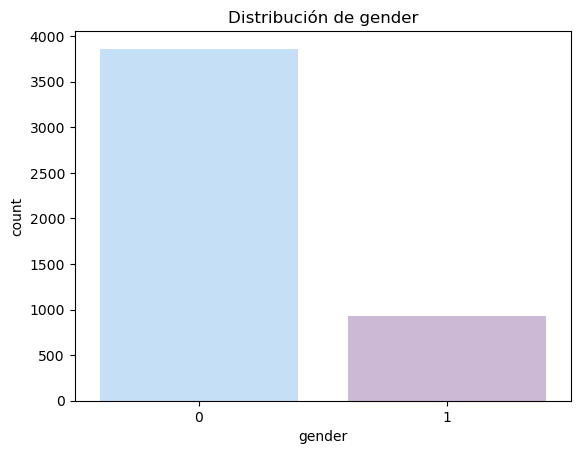

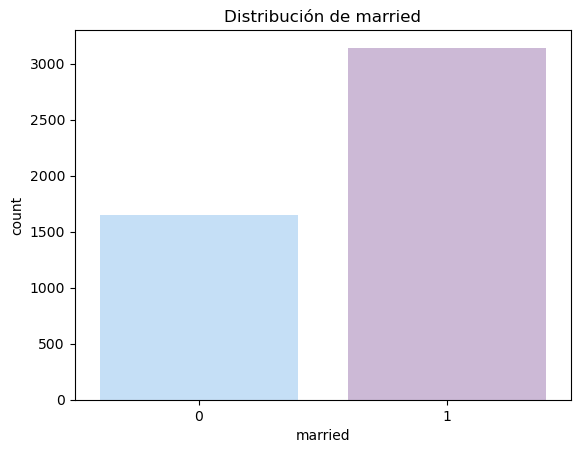

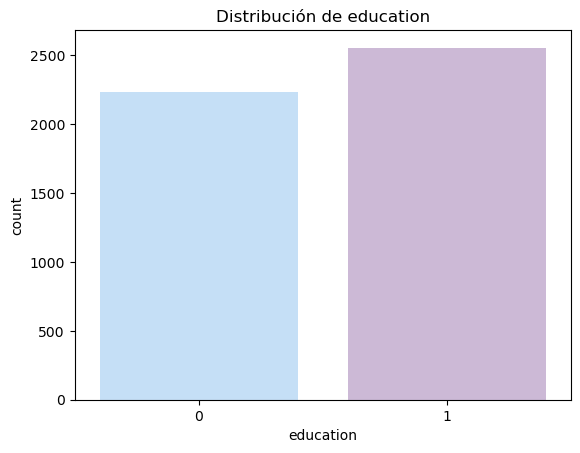

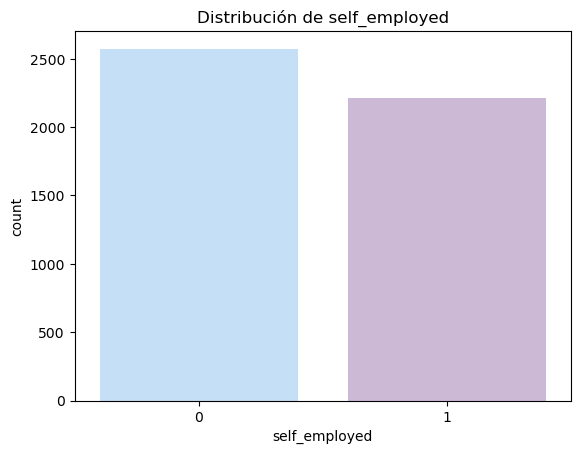

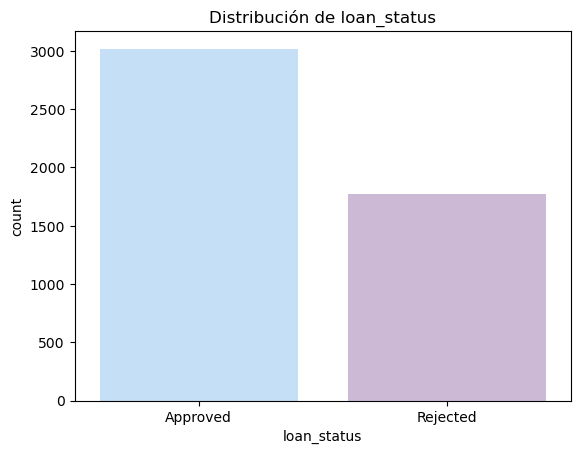

In [27]:
categorical_columns = ['gender', 'married', 'education', 'self_employed', 'loan_status']
for col in categorical_columns:
    sns.countplot(data=df_final, x=col, palette= ['#bde0fe', '#cdb4db'])
    plt.title(f'Distribución de {col}')
    plt.show()



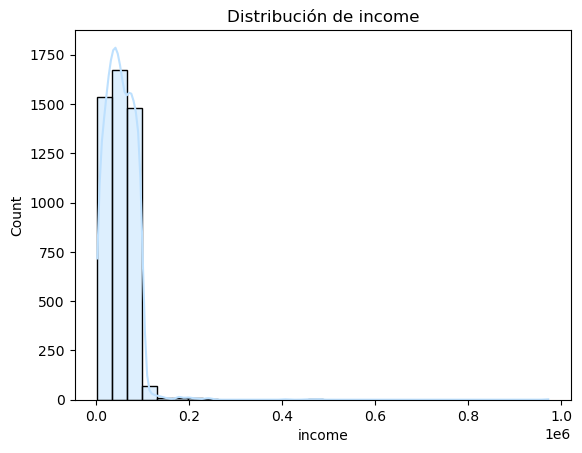

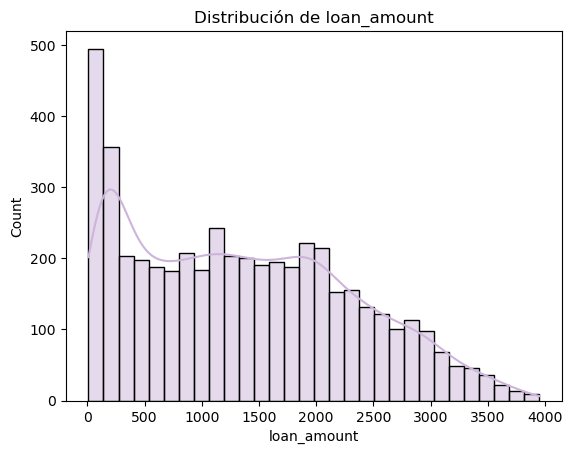

In [30]:
colors = ['#bde0fe', '#cdb4db']

# Generar los histogramas con los colores especificados
numerical_columns = ['income', 'loan_amount']
for col, color in zip(numerical_columns, colors):
    sns.histplot(data=df_final, x=col, bins=30, color=color, kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

In [22]:
features = df_final.drop('loan_status', axis=1)
target = df_final['loan_status']

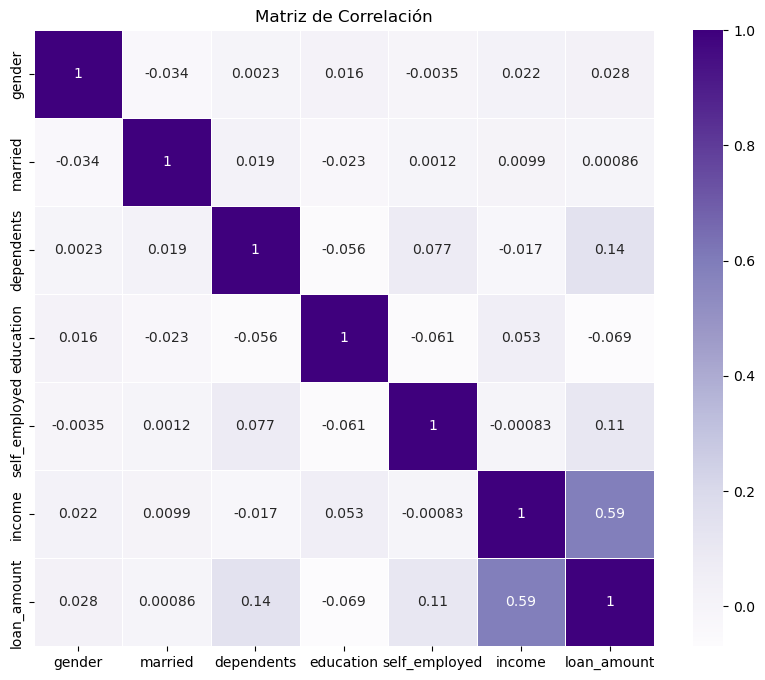

In [31]:
# Matriz de correlación
correlation_matrix = features.corr()

# Mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

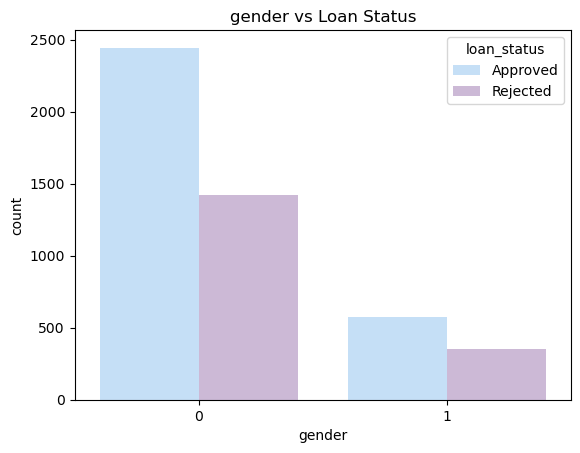

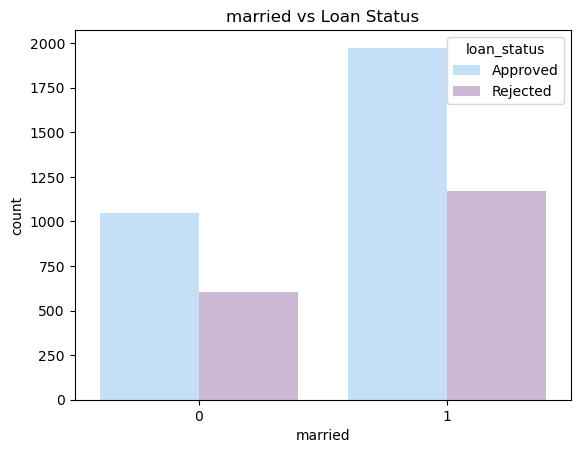

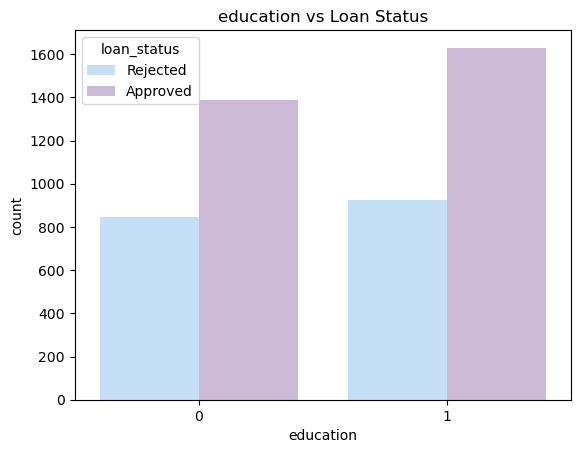

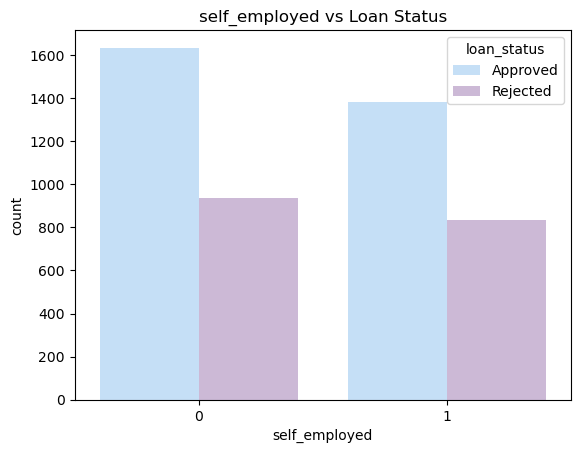

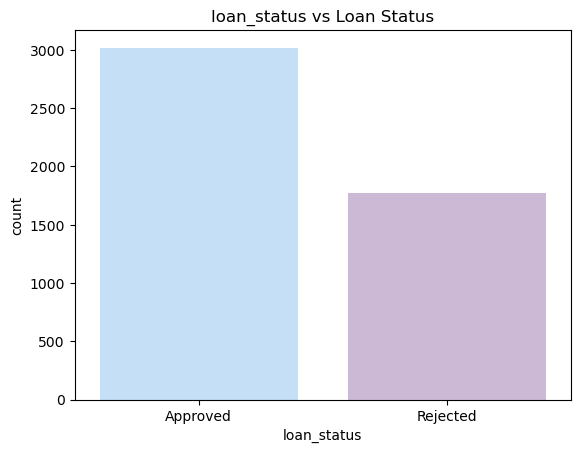

In [32]:
for col in categorical_columns:
    sns.countplot(data=df_final, x=col, palette= ['#bde0fe', '#cdb4db'], hue='loan_status')
    plt.title(f'{col} vs Loan Status')
    plt.show()

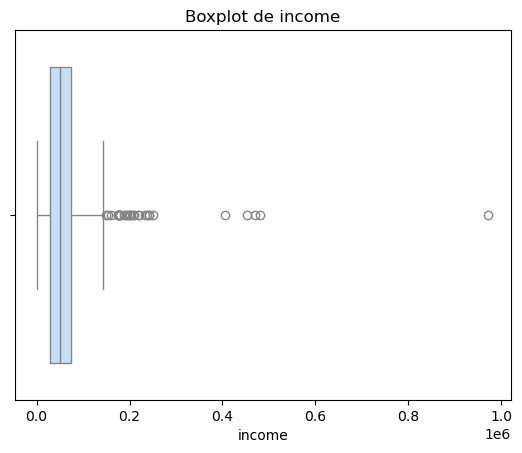

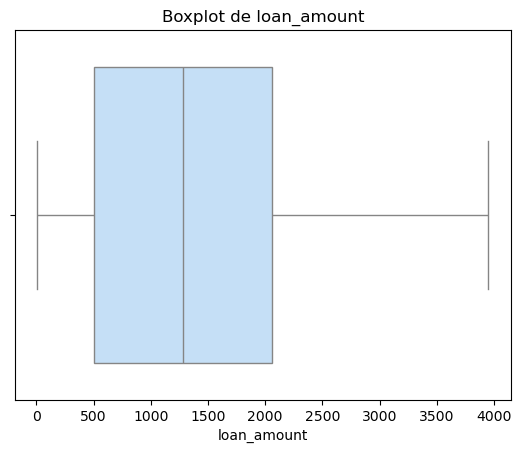

In [33]:
for col in numerical_columns:
    sns.boxplot(data=df_final,palette= ['#bde0fe', '#cdb4db'], x=col)
    plt.title(f'Boxplot de {col}')
    plt.show()